### Permanencia de Baches en las Calles de Hermosillo, Sonora -  Precursores y Efectos.

Procesamiento de Datos Interim (Nivel Plata) ubicados en carpeta data/raw

Etapa 2: Revisiones y Validaciones Basicas de Calidad de Datos (Valores Faltantes, Duplicados y Seleccion de Caracteristicas)

---

Importacion de Librerias

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import missingno as msno

Carga de datos (Nivel Bronce) ubicados en data/interim/1_extract_rename_and_filter en Dataframes de Pandas separados

In [4]:
df_1_reportes_baches = pd.read_csv(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\1_reportes_baches.csv")
df_2_1_geo_urb_ageb = gpd.read_file(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\2_geografia_urbana\260300001a.shp")
df_2_2_geo_urb_vialidades = gpd.read_file(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\2_geografia_urbana\260300001v.shp")
df_3_rezago_ageb = pd.read_csv(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\3_rezago_ageb.csv")
df_4_socioeconomico = pd.read_csv(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\4_socioeconomico.csv")
df_5_climatologico = pd.read_csv(r"C:\Users\Fernando\Desktop\Pher\proyecto_baches\data\interim\1_extract_rename_and_filter\5_climatologico.csv")

##### Inicia pipeline de validacion y transformacion por conjunto de datos

Comenzando por el conjunto de datos de Reportes de Baches del Bachometro de Hermosillo, se observa que cuenta con 7 caracteristicas y 18,800+ muestras.

In [5]:
df_1_reportes_baches

,latitude,longitude,date,neighborhoods,material,description,id
0,29.094161,-110.969471,2021-10-18,[551],1,"Hay un bache en la calle, y los carros se golp...",1
1,29.124060,-110.971318,2021-10-19,[601],1,"Buen dia! Para reportar pavimento dañado, bach...",4
2,29.123985,-110.971286,2021-10-19,[601],1,"Buen dia! Para reportar pavimento dañado, bach...",5
3,29.128777,-110.953926,2021-10-21,[49],1,toda la calle desde el blvd Morelos tiene vari...,6
4,29.083809,-111.042101,2021-10-04,[74],1,C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,7
...,...,...,...,...,...,...,...
18808,29.136864,-110.965249,2024-11-12,[214],1,Bacheo en General José Yáñez entre Yécora y Gr...,22443
18809,29.143007,-111.022179,2024-11-12,[653],1,Bacheo en Villa Bugambilia entre San Pedro y ...,22444
18810,29.166922,-110.982117,2024-11-12,[620],1,Bacheo en Tancitaro entre Paseo Del Cedro y Go...,22445
18811,29.101389,-110.976895,2024-11-12,[397],1,Bacheo en Simón Bley entre José Carmelo y Othó...,22446


In [6]:
df_1_reportes_baches[df_1_reportes_baches["material"]==2]

,latitude,longitude,date,neighborhoods,material,description,id
176,29.132976,-110.952962,2021-10-27,[148],2,bache con más de 6 meses y mal tapado les falt...,255
3102,29.141897,-110.976353,2022-04-11,[658],2,Bacheo de concreto en Topahue entre Reforma y ...,4035
3103,29.141904,-110.976288,2022-04-12,[658],2,Bacheo de concreto en Topahue entre Reforma y ...,4036
3104,29.141892,-110.976384,2022-04-13,[658],2,Bacheo de concreto en Topahue entre Reforma y ...,4039
4151,29.079609,-110.967358,2022-05-04,[447],2,BACHEO EN DR. PESQUEIRA ENTRE NAPOLES Y CAPRI,5206
...,...,...,...,...,...,...,...
12826,29.008572,-110.925131,2024-01-09,[597],2,Bacheo en Músaro entre Caleza y Estribos.,14383
12836,29.039617,-110.983693,2024-01-09,[794],2,Bacheo en Palo Citávaro y Corno Emplumado.,14393
12857,29.008573,-110.925183,2024-01-11,[597],2,Músaro entre Caleza y Estribos.,14415
13055,29.034841,-110.948617,2024-01-25,[688],2,Bacheo en Periférico Sur e Ixtlazihuatl.,14622


Con tan solo observar el DataFrame es posible identificar caracteristicas de alta relevancia, tal como "date", "latitude" y "longitude". Estas nos permitiran ubicar los reportes de baches en tiempo y espacio.

Seguido de estas, tenemos algunas otras caracteristicas que podrian aportar informacion de apoyo como "id", que permitiria asignar un orden general y dentro de un mismo dia, y "description", la cual podria ofrecernos un poco mas de detalle sobre el reporte.

Finalmente se observan caracteristicas como "neighborhoods" y "material". Para las cuales haremos un poco de exploracion con el fin de determinar si permanecen en el conjunto de datos para el analisis o no.

En el caso de "material", validaremos que tantos tipos hay contando los valores unicos de dicha columna.

In [7]:
df_1_reportes_baches["material"].value_counts()

material
1    18715
2       98
Name: count, dtype: int64

En el caso de "neighborhoods", no nos fue posible identificar un catalogo de datos o referencia en la API (dado que no esta documentada) donde pudiesemos relacionar el valor numerico con una Colonia por nombre. Por lo cual, mantendremos la relacion geoespacial utilizando "latitude" y "longitude", y eliminaremos "neighborhoods".

In [8]:
df_1_reportes_baches.drop(columns=["neighborhoods"], inplace=True)
df_1_reportes_baches

,latitude,longitude,date,material,description,id
0,29.094161,-110.969471,2021-10-18,1,"Hay un bache en la calle, y los carros se golp...",1
1,29.124060,-110.971318,2021-10-19,1,"Buen dia! Para reportar pavimento dañado, bach...",4
2,29.123985,-110.971286,2021-10-19,1,"Buen dia! Para reportar pavimento dañado, bach...",5
3,29.128777,-110.953926,2021-10-21,1,toda la calle desde el blvd Morelos tiene vari...,6
4,29.083809,-111.042101,2021-10-04,1,C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,7
...,...,...,...,...,...,...
18808,29.136864,-110.965249,2024-11-12,1,Bacheo en General José Yáñez entre Yécora y Gr...,22443
18809,29.143007,-111.022179,2024-11-12,1,Bacheo en Villa Bugambilia entre San Pedro y ...,22444
18810,29.166922,-110.982117,2024-11-12,1,Bacheo en Tancitaro entre Paseo Del Cedro y Go...,22445
18811,29.101389,-110.976895,2024-11-12,1,Bacheo en Simón Bley entre José Carmelo y Othó...,22446


Ahora efectuamos revisiones basicas de datos faltantes y/o duplicados

In [9]:
df_1_reportes_baches.isnull().sum()

latitude       0
longitude      0
date           0
material       0
description    0
id             0
dtype: int64

<Axes: >

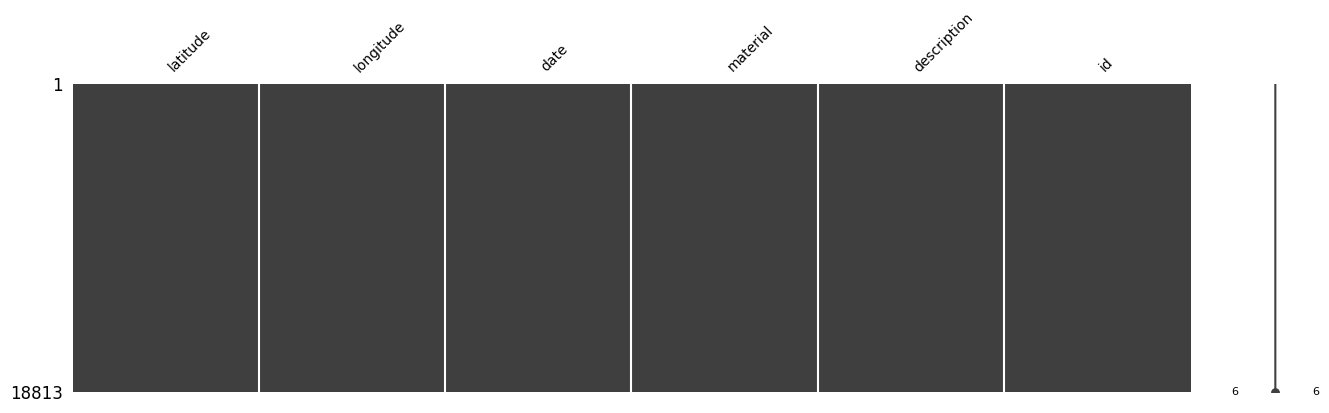

In [10]:
msno.matrix(df_1_reportes_baches, figsize=(16,4), fontsize=10)

In [11]:
df_1_reportes_baches.duplicated().value_counts()

False    18813
Name: count, dtype: int64

En el caso del conjunto de datos de Reportes de Baches, encontramos que no requerira acciones adicionales en lo que respecta a la Validacion Basica de Calidad de Datos.

Ahora, procedemos a trabajar con el conjunto de datos de Geografia Urbana (AGEBs y Vialidades). Comenzaremos con los datos de Geografia Urbana por AGEBs.

In [12]:
df_2_1_geo_urb_ageb

,GEOGRAFICO,CVEGEO,CODIGO,FECHAACT,INSTITUC,GEOMETRIA,geometry
0,ÁREA GEOESTADÍSTICA BÁSICA,2603000011869,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628105.477 1920205.715, 1628295.245..."
1,ÁREA GEOESTADÍSTICA BÁSICA,2603000011746,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628032.93 1921100.78, 1628030.077 1..."
2,ÁREA GEOESTADÍSTICA BÁSICA,2603000012246,6052,12/2007,INEGI,ÁREA,"POLYGON ((1623070.211 1922088.608, 1623066.931..."
3,ÁREA GEOESTADÍSTICA BÁSICA,2603000011750,6052,12/2007,INEGI,ÁREA,"POLYGON ((1628614.97 1922405.429, 1628619.025 ..."
4,ÁREA GEOESTADÍSTICA BÁSICA,2603000011799,6052,12/2007,INEGI,ÁREA,"POLYGON ((1626439.624 1919837.824, 1626436.398..."
...,...,...,...,...,...,...,...
459,ÁREA GEOESTADÍSTICA BÁSICA,2603000018921,6052,12/2007,INEGI,ÁREA,"POLYGON ((1620582.475 1923960.596, 1620637.305..."
460,ÁREA GEOESTADÍSTICA BÁSICA,2603000018936,6052,12/2007,INEGI,ÁREA,"POLYGON ((1618977.777 1924068.068, 1618964.124..."
461,ÁREA GEOESTADÍSTICA BÁSICA,2603000018866,6052,12/2007,INEGI,ÁREA,"POLYGON ((1629804.448 1907536.96, 1629842.996 ..."
462,ÁREA GEOESTADÍSTICA BÁSICA,2603000018870,6052,12/2007,INEGI,ÁREA,"POLYGON ((1621991.424 1914892.695, 1622017.858..."


Con tan solo observar el DataFrame de GeoPandas es posible identificar caracteristicas de alta relevancia, tal como "CVEGEO" y "geometry". Estas nos permitiran identificar, distinguir y graficar las AGEB.

El resto parecen ser caracteristicas que unicamente se repiten, por lo que validaremos y de ahi definiremos que accion tomar al respecto.

In [13]:
static_content_columns_df_2_1 = []

for series_name, series in df_2_1_geo_urb_ageb.drop(columns=["CVEGEO","geometry"]).items():
    print(f"En la columna {series_name} se encontro: {len(series.unique())} valor(es) unico(s)")
    if not len(series.unique())>1: static_content_columns_df_2_1.append(series_name)

En la columna GEOGRAFICO se encontro: 1 valor(es) unico(s)
En la columna CODIGO se encontro: 1 valor(es) unico(s)
En la columna FECHAACT se encontro: 1 valor(es) unico(s)
En la columna INSTITUC se encontro: 1 valor(es) unico(s)
En la columna GEOMETRIA se encontro: 1 valor(es) unico(s)


Dado que estas columnas contienen unicamente valores fijos, descriptivos de los datos mismos talvez, pero no relevantes para este analisis en especifico. Las eliminaremos del conjunto de datos.

In [14]:
df_2_1_geo_urb_ageb.drop(columns=static_content_columns_df_2_1, inplace=True)
df_2_1_geo_urb_ageb

,CVEGEO,geometry
0,2603000011869,"POLYGON ((1628105.477 1920205.715, 1628295.245..."
1,2603000011746,"POLYGON ((1628032.93 1921100.78, 1628030.077 1..."
2,2603000012246,"POLYGON ((1623070.211 1922088.608, 1623066.931..."
3,2603000011750,"POLYGON ((1628614.97 1922405.429, 1628619.025 ..."
4,2603000011799,"POLYGON ((1626439.624 1919837.824, 1626436.398..."
...,...,...
459,2603000018921,"POLYGON ((1620582.475 1923960.596, 1620637.305..."
460,2603000018936,"POLYGON ((1618977.777 1924068.068, 1618964.124..."
461,2603000018866,"POLYGON ((1629804.448 1907536.96, 1629842.996 ..."
462,2603000018870,"POLYGON ((1621991.424 1914892.695, 1622017.858..."


Ahora efectuamos revisiones basicas de datos faltantes y/o duplicados

In [15]:
df_2_1_geo_urb_ageb.isnull().sum()

CVEGEO      0
geometry    0
dtype: int64

<Axes: >

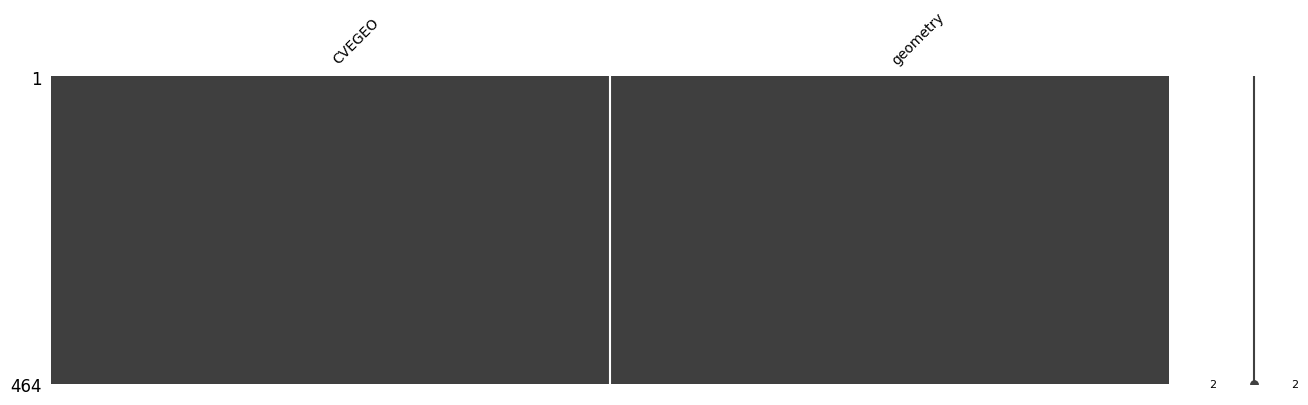

In [16]:
msno.matrix(df_2_1_geo_urb_ageb, figsize=(16,4), fontsize=10)

In [17]:
df_2_1_geo_urb_ageb.duplicated().value_counts()

False    464
Name: count, dtype: int64

En el caso del conjunto de datos de Geografia Urbana (AGEB), requerimos eliminar columnas redundantes, pero no encontramos valores faltantes como parte de la Validacion Basica de Calidad de Datos.

Ahora, procedemos a trabajar con el conjunto de datos de Geografia Urbana de Vialidades.

In [18]:
df_2_2_geo_urb_vialidades

,GEOGRAFICO,TIPOVIAL,NOMVIAL,SENTIDO,DESTINO,CODIGO,FECHAACT,INSTITUC,GEOMETRIA,geometry
0,VIALIDAD,AVENIDA,OTHÓN ALMADA,DOS SENTIDOS,N/A,3144,12/2007,INEGI,LÍNEA,"LINESTRING (1628858.427 1920026.98, 1628800.63..."
1,VIALIDAD,AVENIDA,JOSÉ CARMELO,DOS SENTIDOS,N/A,3144,12/2007,INEGI,LÍNEA,"LINESTRING (1629008.177 1919918.462, 1628960.7..."
2,VIALIDAD,CALLE,DE LA REFORMA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628141.372 1919733.671, 1628136.2..."
3,VIALIDAD,CALLE,GENERAL MIGUEL PIÑA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628527.419 1919765.336, 1628523.0..."
4,VIALIDAD,CALLE,GUADALUPE VICTORIA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628330.694 1919749.357, 1628326.7..."
...,...,...,...,...,...,...,...,...,...,...
11773,VIALIDAD,CALLE,BAYERCA,DOS SENTIDOS,N/A,3164,11/2010,INEGI,LÍNEA,"LINESTRING (1630085.594 1907891.265, 1630146.0..."
11774,VIALIDAD,PRIVADA,DESERTI,DOS SENTIDOS,N/A,3158,06/2010,INEGI,LÍNEA,"LINESTRING (1627190.13 1910152.853, 1627217.80..."
11775,VIALIDAD,PRIVADA,DESERTI,DOS SENTIDOS,N/A,3158,06/2010,INEGI,LÍNEA,"LINESTRING (1627190.13 1910152.853, 1627216.79..."
11776,VIALIDAD,PRIVADA,DESERTI,DOS SENTIDOS,N/A,3158,06/2010,INEGI,LÍNEA,"LINESTRING (1627126.578 1910192.615, 1627190.1..."


Con tan solo observar el DataFrame de GeoPandas es posible identificar caracteristicas de alta relevancia, tal como "NOMVIAL", "TIPOVIAL" y "geometry". Estas nos permitiran identificar, distinguir y graficar las Vialidades.

Podemos observar algunas caracteristicas como "CODIGO", que parece otorgar un mismo codigo para distintos valores de "NOMVIAL", y "SENTIDO", que de igual manera pudiese aportar al analisis y exploraremos un poco mas adelante para determinarlo.

El resto parecen ser caracteristicas que unicamente se repiten, por lo que validaremos y de ahi definiremos que accion tomar al respecto.

In [19]:
static_content_columns_df_2_2 = []

for series_name, series in df_2_2_geo_urb_vialidades.drop(columns=["NOMVIAL","TIPOVIAL","geometry"]).items():
    print(f"En la columna {series_name} se encontro: {len(series.unique())} valor(es) unico(s)")
    if not len(series.unique())>1: static_content_columns_df_2_2.append(series_name)

En la columna GEOGRAFICO se encontro: 1 valor(es) unico(s)
En la columna SENTIDO se encontro: 4 valor(es) unico(s)
En la columna DESTINO se encontro: 9 valor(es) unico(s)
En la columna CODIGO se encontro: 14 valor(es) unico(s)
En la columna FECHAACT se encontro: 9 valor(es) unico(s)
En la columna INSTITUC se encontro: 1 valor(es) unico(s)
En la columna GEOMETRIA se encontro: 1 valor(es) unico(s)


Dado que las columnas "GEOGRAFICO", "INSTITUC" y "GEOMETRIA" contienen unicamente valores fijos, descriptivos de los datos mismos talvez, pero no relevantes para este analisis en especifico. Las eliminaremos del conjunto de datos.

En el caso de las columnas restantes, algunas permaneceran en el conjunto de datos puesto que no conocemos que impacto podrian tener en el analisis, a excepcion de dos que seran eliminadas:

"FECHAACT" - Dado que solo describe le ultima fecha de actualizacion de los datos de geometria, pero no sobre la vialidad en si.

"CODIGO" - Dado que contiene codigos repetidos para vialidades notablemente distantes entre si, ademas de que no fue posible cotejar con un diccionario de datos el significado de dicho codigo.

In [20]:
df_2_2_geo_urb_vialidades.drop(columns=static_content_columns_df_2_2, inplace=True)
df_2_2_geo_urb_vialidades.drop(columns=["FECHAACT"], inplace=True)
df_2_2_geo_urb_vialidades.drop(columns=["CODIGO"], inplace=True)
df_2_2_geo_urb_vialidades

,TIPOVIAL,NOMVIAL,SENTIDO,DESTINO,geometry
0,AVENIDA,OTHÓN ALMADA,DOS SENTIDOS,N/A,"LINESTRING (1628858.427 1920026.98, 1628800.63..."
1,AVENIDA,JOSÉ CARMELO,DOS SENTIDOS,N/A,"LINESTRING (1629008.177 1919918.462, 1628960.7..."
2,CALLE,DE LA REFORMA,DOS SENTIDOS,N/A,"LINESTRING (1628141.372 1919733.671, 1628136.2..."
3,CALLE,GENERAL MIGUEL PIÑA,DOS SENTIDOS,N/A,"LINESTRING (1628527.419 1919765.336, 1628523.0..."
4,CALLE,GUADALUPE VICTORIA,DOS SENTIDOS,N/A,"LINESTRING (1628330.694 1919749.357, 1628326.7..."
...,...,...,...,...,...
11773,CALLE,BAYERCA,DOS SENTIDOS,N/A,"LINESTRING (1630085.594 1907891.265, 1630146.0..."
11774,PRIVADA,DESERTI,DOS SENTIDOS,N/A,"LINESTRING (1627190.13 1910152.853, 1627217.80..."
11775,PRIVADA,DESERTI,DOS SENTIDOS,N/A,"LINESTRING (1627190.13 1910152.853, 1627216.79..."
11776,PRIVADA,DESERTI,DOS SENTIDOS,N/A,"LINESTRING (1627126.578 1910192.615, 1627190.1..."


Ahora efectuamos revisiones basicas de datos faltantes y/o duplicados

In [21]:
df_2_2_geo_urb_vialidades.isnull().sum()

TIPOVIAL    0
NOMVIAL     0
SENTIDO     0
DESTINO     0
geometry    0
dtype: int64

<Axes: >

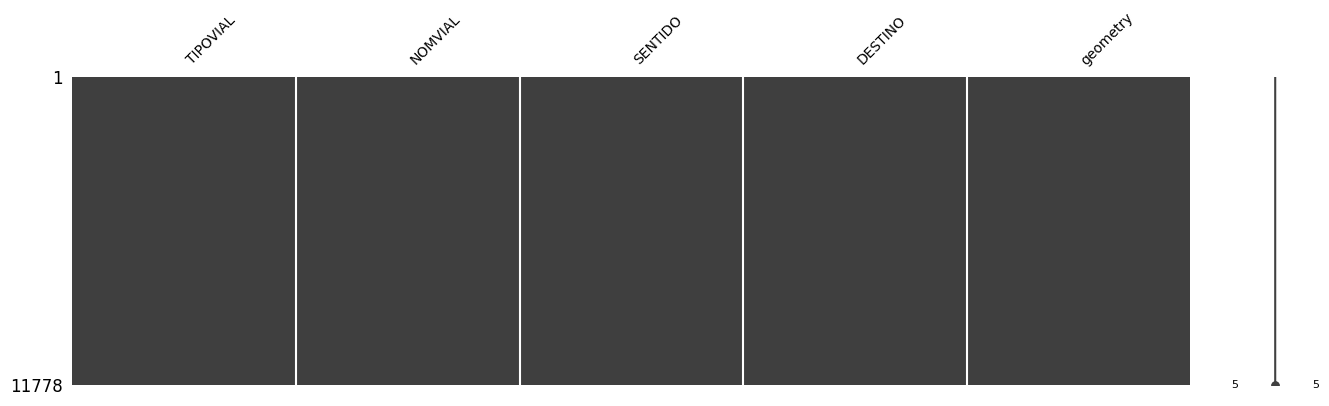

In [22]:
msno.matrix(df_2_2_geo_urb_vialidades, figsize=(16,4), fontsize=10)

In [23]:
df_2_2_geo_urb_vialidades.duplicated().value_counts()

False    11778
Name: count, dtype: int64

En el caso del conjunto de datos de Geografia Urbana (AGEB), requerimos eliminar columnas redundantes, pero no encontramos valores faltantes o duplicados como parte de la Validacion Basica de Calidad de Datos.

Ahora, procedemos a trabajar con el conjunto de datos de Rezago por AGEB.

In [24]:
df_3_rezago_ageb

,CVE_AGEB,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOT,P6A14NAE,...,OVSEE,OVSAE,OVPT,OVHAC,OVSREF,OVSINT,OSCEL,IM_2020,GM_2020,IMN_2020
0,2600100010055,26,Sonora,1,Aconchi,1,Aconchi,0055,764,2.857143,...,0.130890,0.000000,0.000000,25.261780,2.748691,59.424084,7.853403,122.290233,Bajo,0.955285
1,260010001006A,26,Sonora,1,Aconchi,1,Aconchi,006A,658,6.024096,...,0.151976,0.000000,0.000000,14.133739,3.191489,52.279635,9.118541,121.599877,Bajo,0.949893
2,2600100010110,26,Sonora,1,Aconchi,1,Aconchi,0110,82,0.000000,...,0.000000,1.219512,0.000000,56.097561,0.000000,87.804878,1.219512,121.872595,Bajo,0.952023
3,260010001013A,26,Sonora,1,Aconchi,1,Aconchi,013A,72,0.000000,...,0.000000,0.000000,0.000000,72.222222,8.333333,93.055556,4.166667,121.219751,Bajo,0.946923
4,2600200010512,26,Sonora,2,Agua Prieta,1,Agua Prieta,0512,1176,2.366864,...,0.683177,0.000000,0.170794,24.594364,3.757472,27.839453,6.404782,120.402236,Medio,0.940537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,2607200010112,26,Sonora,72,San Ignacio Río Muerto,1,San Ignacio Río Muerto,0112,460,2.702703,...,0.440529,0.220264,1.101322,38.986784,1.321586,73.788546,2.422907,120.853799,Medio,0.944065
2092,260720001024A,26,Sonora,72,San Ignacio Río Muerto,1,San Ignacio Río Muerto,024A,227,0.000000,...,1.785714,0.000000,1.785714,25.000000,3.125000,72.767857,4.910714,121.418799,Bajo,0.948478
2093,2607200170127,26,Sonora,72,San Ignacio Río Muerto,17,Bahía de Lobos,0127,1691,5.182927,...,3.622328,5.225653,7.779097,56.235154,32.482185,92.399050,18.171021,112.694118,Muy alto,0.880324
2094,2607200170131,26,Sonora,72,San Ignacio Río Muerto,17,Bahía de Lobos,0131,1012,2.027027,...,2.077151,8.011869,5.143422,49.060336,13.550940,86.152324,10.286845,116.683658,Alto,0.911489


Con tan solo observar el DataFrame de Pandas es posible identificar caracteristicas de alta relevancia, tal como "CVE_AGEB", "NOM_MUN", "NOM_LOC" y el grupo de indicadores numericos. Estos nos permitira filtrar los datos para unicamente el municipio de Hermosillo, y relacionar los indicadores socioeconomicos a su respectivo AGEB dentro del mismo.

Podemos observar algunas caracteristicas como "NOM_ENT", "ENT", "AGEB" y otros, que pudieran resultar redundantes (valores fijos) o sin relevancia para este analisis.

Primeramente filtraremos para trabajar con unicamante datos de Hermosillo.

In [25]:
df_3_rezago_ageb = df_3_rezago_ageb[(df_3_rezago_ageb["NOM_MUN"]=="Hermosillo") & (df_3_rezago_ageb["NOM_LOC"]=="Hermosillo")]
df_3_rezago_ageb.reset_index(inplace=True, drop=True)
df_3_rezago_ageb

,CVE_AGEB,ENT,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,POB_TOT,P6A14NAE,...,OVSEE,OVSAE,OVPT,OVHAC,OVSREF,OVSINT,OSCEL,IM_2020,GM_2020,IMN_2020
0,2603000010080,26,Sonora,30,Hermosillo,1,Hermosillo,0080,685,3.200000,...,0.729927,0.875912,0.000000,23.795620,6.569343,67.299270,3.649635,121.547066,Bajo,0.949480
1,2603000010095,26,Sonora,30,Hermosillo,1,Hermosillo,0095,1254,5.614035,...,0.079745,0.000000,0.398724,18.261563,2.232855,35.247209,1.674641,123.221709,Bajo,0.962562
2,2603000010108,26,Sonora,30,Hermosillo,1,Hermosillo,0108,243,0.000000,...,0.000000,0.000000,0.000000,17.283951,0.411523,16.049383,0.000000,125.190251,Muy bajo,0.977939
3,2603000010112,26,Sonora,30,Hermosillo,1,Hermosillo,0112,1114,0.000000,...,0.000000,0.000000,0.359066,4.667864,0.089767,6.822262,0.179533,126.725676,Muy bajo,0.989933
4,2603000010131,26,Sonora,30,Hermosillo,1,Hermosillo,0131,1008,0.000000,...,0.000000,0.000000,0.000000,2.490040,0.000000,0.996016,0.498008,127.182348,Muy bajo,0.993501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2603000018921,26,Sonora,30,Hermosillo,1,Hermosillo,8921,222,11.764706,...,4.954955,97.297297,47.747748,46.396396,40.090090,92.342342,17.567568,98.191425,Muy alto,0.767035
470,2603000018936,26,Sonora,30,Hermosillo,1,Hermosillo,8936,106,0.000000,...,18.867925,21.698113,19.811321,16.981132,20.754717,29.245283,11.320755,111.785187,Muy alto,0.873224
471,2603000018955,26,Sonora,30,Hermosillo,1,Hermosillo,8955,4065,3.182375,...,0.000000,0.098668,0.000000,23.951653,4.095732,47.816432,3.059462,123.262879,Bajo,0.962883
472,260300001896A,26,Sonora,30,Hermosillo,1,Hermosillo,896A,305,7.692308,...,1.666667,40.333333,64.000000,44.666667,40.333333,95.333333,24.333333,99.450176,Muy alto,0.776867


Ahora exploraremos un poco para determinar que caracteristicas permanecen y cuales no.

Primero buscaremos caracteristicas redundantes (con valores fijos).

In [26]:
static_content_columns_df_3 = []

for series_name, series in df_3_rezago_ageb.drop(columns=["CVE_AGEB"]).items():
    print(f"En la columna {series_name} se encontro: {len(series.unique())} valor(es) unico(s)")
    if not len(series.unique())>1: static_content_columns_df_3.append(series_name)

En la columna ENT se encontro: 1 valor(es) unico(s)
En la columna NOM_ENT se encontro: 1 valor(es) unico(s)
En la columna MUN se encontro: 1 valor(es) unico(s)
En la columna NOM_MUN se encontro: 1 valor(es) unico(s)
En la columna LOC se encontro: 1 valor(es) unico(s)
En la columna NOM_LOC se encontro: 1 valor(es) unico(s)
En la columna AGEB se encontro: 474 valor(es) unico(s)
En la columna POB_TOT se encontro: 450 valor(es) unico(s)
En la columna P6A14NAE se encontro: 363 valor(es) unico(s)
En la columna SBASC se encontro: 468 valor(es) unico(s)
En la columna PSDSS se encontro: 472 valor(es) unico(s)
En la columna OVSDE se encontro: 102 valor(es) unico(s)
En la columna OVSEE se encontro: 231 valor(es) unico(s)
En la columna OVSAE se encontro: 168 valor(es) unico(s)
En la columna OVPT se encontro: 329 valor(es) unico(s)
En la columna OVHAC se encontro: 466 valor(es) unico(s)
En la columna OVSREF se encontro: 394 valor(es) unico(s)
En la columna OVSINT se encontro: 468 valor(es) unico(s)

Podemos osbservar columnas como "ENT" y "NOM_ENT" que contienen unicamente valores fijos. Estos eran relevantes en el dataset completo, sin embargo al filtrar y quedarnos unicamente con los datos de Hermosillo, solamente se repiten y no resultan relevantes. Seran eliminados.

En el caso de las columnas restantes, todas muestran variabilidad y desconocemos el impacto que pudiesen tener en el analisis, por lo que permanecerean en el conjunto. La excepcion seria la columna de "AGEB", puesto que a pesar de presentar variabilidad, es redundante respecto a CVE_AGEB, dado que es equivalente a sus ultimos 4 caracteres, y esto no aporta al analisis de forma alguna. Sera eliminada.

In [27]:
df_3_rezago_ageb = df_3_rezago_ageb.drop(columns=static_content_columns_df_3)
df_3_rezago_ageb.drop(columns=["AGEB"], inplace=True)
df_3_rezago_ageb

,CVE_AGEB,POB_TOT,P6A14NAE,SBASC,PSDSS,OVSDE,OVSEE,OVSAE,OVPT,OVHAC,OVSREF,OVSINT,OSCEL,IM_2020,GM_2020,IMN_2020
0,2603000010080,685,3.200000,23.059867,24.963504,0.000000,0.729927,0.875912,0.000000,23.795620,6.569343,67.299270,3.649635,121.547066,Bajo,0.949480
1,2603000010095,1254,5.614035,14.578313,20.223821,0.000000,0.079745,0.000000,0.398724,18.261563,2.232855,35.247209,1.674641,123.221709,Bajo,0.962562
2,2603000010108,243,0.000000,11.038961,18.106996,0.000000,0.000000,0.000000,0.000000,17.283951,0.411523,16.049383,0.000000,125.190251,Muy bajo,0.977939
3,2603000010112,1114,0.000000,2.827763,11.041293,0.000000,0.000000,0.000000,0.359066,4.667864,0.089767,6.822262,0.179533,126.725676,Muy bajo,0.989933
4,2603000010131,1008,0.000000,2.127660,7.638889,0.000000,0.000000,0.000000,0.000000,2.490040,0.000000,0.996016,0.498008,127.182348,Muy bajo,0.993501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2603000018921,222,11.764706,54.658385,30.136986,7.207207,4.954955,97.297297,47.747748,46.396396,40.090090,92.342342,17.567568,98.191425,Muy alto,0.767035
470,2603000018936,106,0.000000,23.255814,16.037736,2.830189,18.867925,21.698113,19.811321,16.981132,20.754717,29.245283,11.320755,111.785187,Muy alto,0.873224
471,2603000018955,4065,3.182375,15.011459,18.794588,0.000000,0.000000,0.098668,0.000000,23.951653,4.095732,47.816432,3.059462,123.262879,Bajo,0.962883
472,260300001896A,305,7.692308,52.444444,43.934426,14.000000,1.666667,40.333333,64.000000,44.666667,40.333333,95.333333,24.333333,99.450176,Muy alto,0.776867


Ahora efectuamos revisiones basicas de datos faltantes y/o duplicados

In [28]:
df_3_rezago_ageb.isnull().sum()

CVE_AGEB    0
POB_TOT     0
P6A14NAE    0
SBASC       0
PSDSS       0
OVSDE       0
OVSEE       0
OVSAE       0
OVPT        0
OVHAC       0
OVSREF      0
OVSINT      0
OSCEL       0
IM_2020     0
GM_2020     0
IMN_2020    0
dtype: int64

<Axes: >

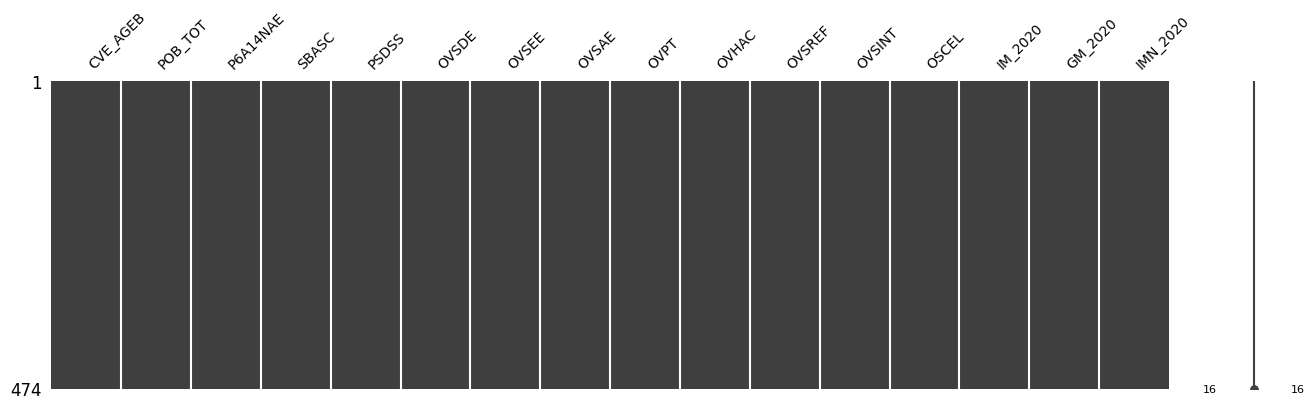

In [29]:
msno.matrix(df_3_rezago_ageb, figsize=(16,4), fontsize=10)

In [30]:
df_3_rezago_ageb.duplicated().value_counts()

False    474
Name: count, dtype: int64

En el caso del conjunto de datos de Rezago por AGEB, requerimos eliminar columnas redundantes, pero no encontramos valores faltantes o duplicados como parte de la Validacion Basica de Calidad de Datos.

Ahora, procedemos a trabajar con el conjunto de datos de Indicadores Socioeconomicos del INEGI.

In [31]:
df_4_socioeconomico

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,26,Sonora,0,Total de la entidad Sonora,0,Total de la entidad,0000,0,2944840,1472643,...,244972,811378,530511,501521,210780,126299,32807,48777,302080,11895
1,26,Sonora,1,Aconchi,0,Total del municipio,0000,0,2563,1227,...,219,704,254,613,53,43,35,61,468,18
2,26,Sonora,1,Aconchi,1,Total de la localidad urbana,0000,0,1650,785,...,189,473,193,394,42,34,19,32,290,10
3,26,Sonora,1,Aconchi,1,Total AGEB urbana,0055,0,764,365,...,87,211,93,183,16,13,6,15,124,4
4,26,Sonora,1,Aconchi,1,Aconchi,0055,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71010,26,Sonora,72,San Ignacio Río Muerto,17,Total AGEB urbana,0305,0,48,24,...,0,8,0,*,0,0,5,3,11,3
71011,26,Sonora,72,San Ignacio Río Muerto,17,Bahía de Lobos,0305,1,10,3,...,0,*,0,0,0,0,3,*,3,*
71012,26,Sonora,72,San Ignacio Río Muerto,17,Bahía de Lobos,0305,2,11,*,...,*,*,*,*,*,*,*,*,*,*
71013,26,Sonora,72,San Ignacio Río Muerto,17,Bahía de Lobos,0305,3,22,13,...,0,4,0,*,0,0,*,*,5,*


In [32]:
df_4_socioeconomico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71015 entries, 0 to 71014
Columns: 230 entries, ENTIDAD to VPH_SINTIC
dtypes: int64(6), object(224)
memory usage: 124.6+ MB


Con tan solo observar el DataFrame de Pandas es posible identificar caracteristicas de alta relevancia, tal como "AGEB", "NOM_MUN", "NOM_LOC" y el grupo de indicadores numericos. Estos nos permitira filtrar los datos para unicamente el municipio de Hermosillo, y relacionar los indicadores socioeconomicos a su respectivo AGEB dentro del mismo.

Podemos observar algunas caracteristicas como "NOM_ENT", "ENTIDAD", y otros, que pudieran resultar redundantes (valores fijos) o sin relevancia para este analisis.

Primeramente filtraremos para trabajar con unicamante datos de Hermosillo.

In [33]:
df_4_socioeconomico = df_4_socioeconomico[(df_4_socioeconomico["NOM_MUN"]=="Hermosillo") & (df_4_socioeconomico["NOM_LOC"]=="Hermosillo")]
df_4_socioeconomico.reset_index(inplace=True, drop=True)
df_4_socioeconomico

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,26,Sonora,30,Hermosillo,1,Hermosillo,0023,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,Sonora,30,Hermosillo,1,Hermosillo,0023,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,Sonora,30,Hermosillo,1,Hermosillo,0023,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,Sonora,30,Hermosillo,1,Hermosillo,0023,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,Sonora,30,Hermosillo,1,Hermosillo,0023,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,26,Sonora,30,Hermosillo,1,Hermosillo,8993,40,50,26,...,5,19,15,11,11,4,*,0,3,0
15517,26,Sonora,30,Hermosillo,1,Hermosillo,8993,41,29,14,...,3,12,9,9,5,4,*,0,*,0
15518,26,Sonora,30,Hermosillo,1,Hermosillo,8993,42,60,35,...,6,21,18,13,9,5,0,0,3,0
15519,26,Sonora,30,Hermosillo,1,Hermosillo,8993,43,27,12,...,5,9,6,6,5,3,*,0,*,0


Ahora exploraremos un poco para determinar que caracteristicas permanecen y cuales no.

Primero buscaremos caracteristicas redundantes (con valores fijos).

In [34]:
static_content_columns_df_4 = []

for series_name, series in df_4_socioeconomico.drop(columns=["AGEB"]).items():
    print(f"En la columna {series_name} se encontro: {len(series.unique())} valor(es) unico(s)")
    if not len(series.unique())>1: static_content_columns_df_4.append(series_name)

En la columna ENTIDAD se encontro: 1 valor(es) unico(s)
En la columna NOM_ENT se encontro: 1 valor(es) unico(s)
En la columna MUN se encontro: 1 valor(es) unico(s)
En la columna NOM_MUN se encontro: 1 valor(es) unico(s)
En la columna LOC se encontro: 1 valor(es) unico(s)
En la columna NOM_LOC se encontro: 1 valor(es) unico(s)
En la columna MZA se encontro: 193 valor(es) unico(s)
En la columna POBTOT se encontro: 336 valor(es) unico(s)
En la columna POBFEM se encontro: 195 valor(es) unico(s)
En la columna POBMAS se encontro: 194 valor(es) unico(s)
En la columna P_0A2 se encontro: 29 valor(es) unico(s)
En la columna P_0A2_F se encontro: 18 valor(es) unico(s)
En la columna P_0A2_M se encontro: 18 valor(es) unico(s)
En la columna P_3YMAS se encontro: 329 valor(es) unico(s)
En la columna P_3YMAS_F se encontro: 192 valor(es) unico(s)
En la columna P_3YMAS_M se encontro: 188 valor(es) unico(s)
En la columna P_5YMAS se encontro: 320 valor(es) unico(s)
En la columna P_5YMAS_F se encontro: 186 v

Podemos observar columnas como "ENT" y "NOM_ENT" que contienen unicamente valores fijos. Estos eran relevantes en el dataset completo, sin embargo al filtrar y quedarnos unicamente con los datos de Hermosillo, solamente se repiten y no resultan relevantes. Seran eliminados.

En el caso de las columnas restantes, todas muestran variabilidad y desconocemos el impacto que pudiesen tener en el analisis, por lo que permanecerean en el conjunto.

In [35]:
df_4_socioeconomico = df_4_socioeconomico.drop(columns=static_content_columns_df_4)
df_4_socioeconomico.drop(columns=["AGEB"], inplace=True)
df_4_socioeconomico

,MZA,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,40,50,26,24,5,*,4,45,25,20,...,5,19,15,11,11,4,*,0,3,0
15517,41,29,14,15,*,0,*,27,14,13,...,3,12,9,9,5,4,*,0,*,0
15518,42,60,35,25,3,3,0,57,32,25,...,6,21,18,13,9,5,0,0,3,0
15519,43,27,12,15,*,*,*,25,11,14,...,5,9,6,6,5,3,*,0,*,0


Ahora efectuamos revisiones basicas de datos faltantes y/o duplicados

In [36]:
df_4_socioeconomico.isnull().sum()

MZA            0
POBTOT         0
POBFEM         0
POBMAS         0
P_0A2          0
              ..
VPH_CVJ        0
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
Length: 223, dtype: int64

<Axes: >

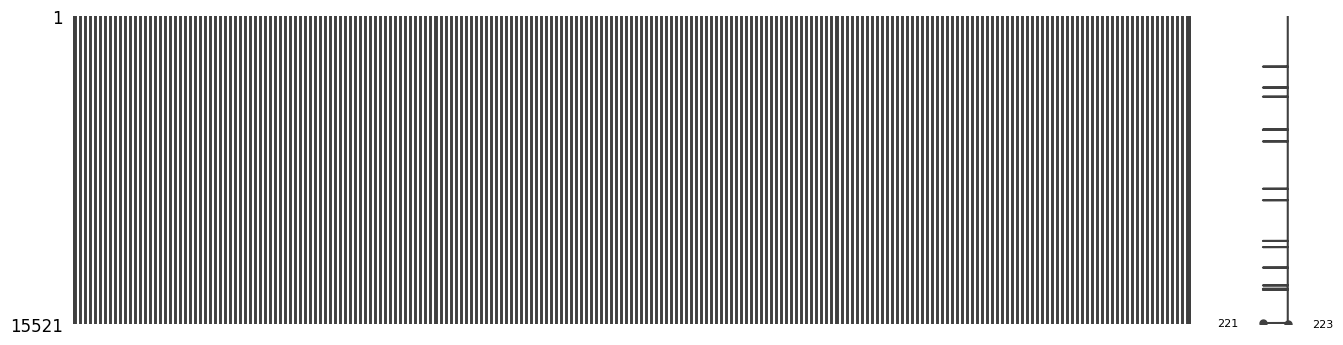

In [37]:
msno.matrix(df_4_socioeconomico, figsize=(16,4), fontsize=10)

In [38]:
df_4_socioeconomico.duplicated().value_counts()

False    13851
True      1670
Name: count, dtype: int64

In [39]:
df_5_climatologico

,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,29.06854,-110.975876,214.0,-25200,America/Denver,MST
1,time,temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),NaN
2,2021-01-01,12.4,4.00,4.00,0.00,NaN
3,2021-01-02,13.1,0.00,0.00,0.00,NaN
4,2021-01-03,13.7,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...
1408,2024-11-07,19.1,0.00,0.00,0.00,NaN
1409,2024-11-08,18.6,0.00,0.00,0.00,NaN
1410,2024-11-09,19.3,0.00,0.00,0.00,NaN
1411,2024-11-10,19.9,0.00,0.00,0.00,NaN


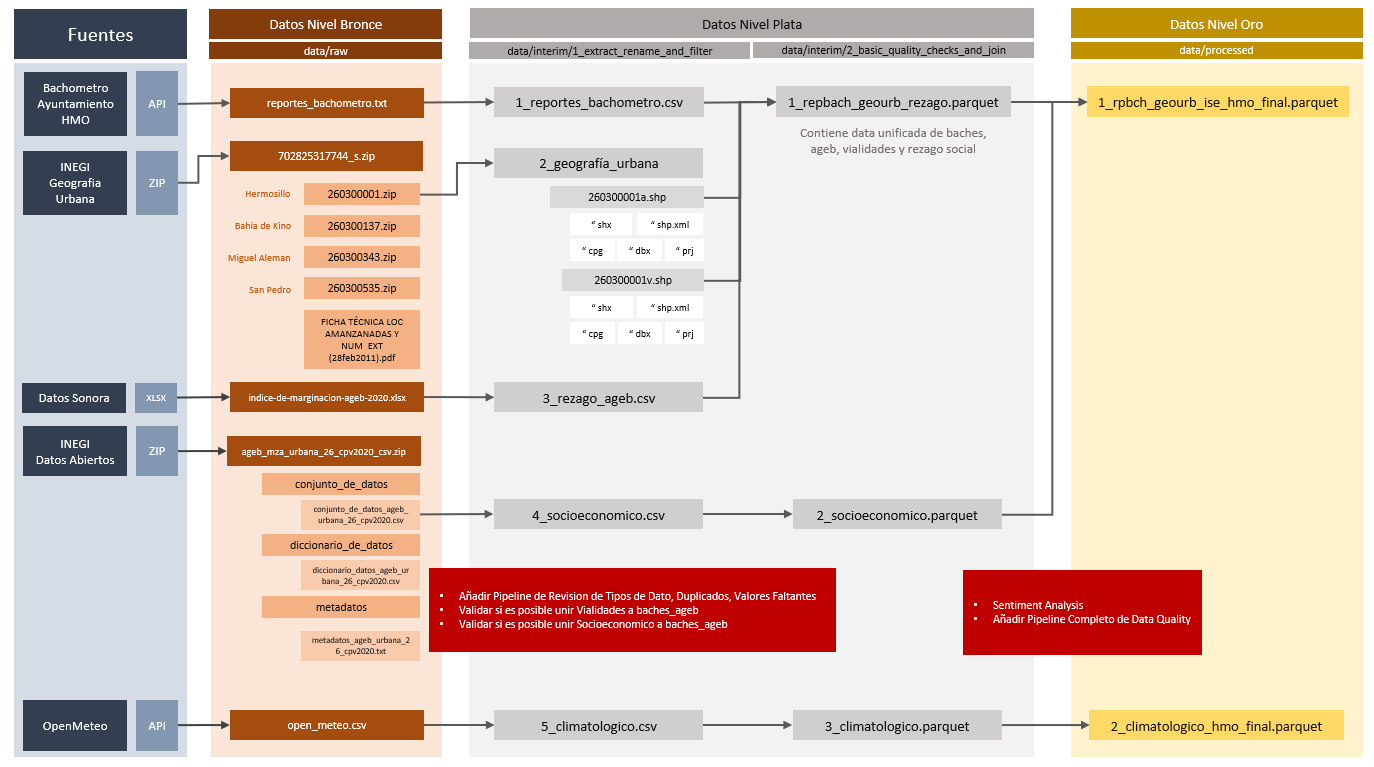